In [36]:
'''
Team members details:

Name: Nishant Banakar
SRN: PES1UG22CS396

Name: Naman K Rao
SRN: PES1UG22CS372

Name: Pranav Jigalur
SRN: PES1UG22CS430
'''


#1st Question

import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns


#1.Classifying the data as Nominal,Ordinal,Ratio or Interval
df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")
df.info()

data_types = {
    'PassengerId': 'Nominal',
    'Survived': 'Nominal',
    'Pclass': 'Ordinal',
    'Name': 'Nominal',
    'Sex': 'Nominal',
    'Age': 'Ratio/Interval',
    'SibSp': 'Ratio/Interval',
    'Parch': 'Ratio/Interval',
    'Ticket': 'Nominal',
    'Fare': 'Ratio/Interval',
    'Cabin': 'Nominal',
    'Embarked': 'Nominal'
}
#rational for each classification is given in the output:
print("--------------------------------------------------------")
for feature, data_type in data_types.items():
    print(f"{feature}: {data_type}")

print("PassengerId is a unique identifier for each passenger and does not have any inherent order or magnitude. It is used for identification purposes. \nSurvived is a binary variable that indicates whether a passenger survived (1) or did not survive (0). It represents nominal data as there are only two categories. \nPclass is an ordinal variable, as it represents different passenger classes (1st, 2nd, 3rd) with a meaningful order. However, the intervals between classes may not be uniform. \nName is a nominal variable that uniquely identifies passengers based on their names. While names have meaning, they are not used for mathematical analysis in their raw form. \nSex is a nominal variable that represents gender (male or female). It does not have an inherent order or magnitude. \nAge is a continuous variable that can be measured on a numeric scale. It has a meaningful order and magnitude. While age can be treated as a ratio variable, it's often treated as an interval variable because the zero age (birth) is somewhat arbitrary. \nSibSp is a continuous variable representing the number of siblings and spouses aboard the Titanic. It can be measured on a numeric scale and has a meaningful order and magnitude.\nParch is a continuous variable representing the number of parents and children aboard the Titanic. Similar to SibSp, it can be measured on a numeric scale with a meaningful order and magnitude. \nTicket is a nominal variable that uniquely identifies passengers based on their ticket numbers. It is not used for mathematical analysis in its raw form. \nFare is a continuous variable representing the fare paid by passengers. It can be measured on a numeric scale, has a meaningful order, and a non-arbitrary point. \nCabin is a nominal variable that uniquely identifies passengers based on their cabin numbers. It is not used for mathematical analysis in its raw form.Embarked is a nominal variable representing the port of embarkation. It does not have an inherent order or magnitude.")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------------
PassengerId: Nominal
Survived: Nominal
Pclass: Ordinal
Name: Nominal
Sex: Nominal
Age: Ratio/Interval
SibSp: Ratio/Interval
Parch: Ratio/Interval
Ticket: Nominal
Fare: Ratio/Interval
Cabi

In [35]:
#2nd Question
import pandas as pd
data = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")


for feature in data.columns:

    data_type = data[feature].dtype

    if data_type == 'object':
        mode = data[feature].mode().values[0]
        print(f"{feature}: Mode = {mode}")

    elif data_type == bool:
        mode = data[feature].mode().values[0]
        print(f"{feature}: Mode = {mode}")

    elif data_type in ['int64', 'float64']:
        median = data[feature].median()
        standard_deviation = data[feature].std()
        range_values = max(data[feature]) - min(data[feature])

        print(f"{feature}: Median = {median}, Standard Deviation = {standard_deviation}, Range = {range_values}")
        #Summary Statistic provided for given features.

PassengerId: Median = 446.0, Standard Deviation = 257.3538420152301, Range = 890
Survived: Median = 0.0, Standard Deviation = 0.4865924542648585, Range = 1
Pclass: Median = 3.0, Standard Deviation = 0.8360712409770513, Range = 2
Name: Mode = Abbing, Mr. Anthony
Sex: Mode = male
Age: Median = 28.0, Standard Deviation = 14.526497332334044, Range = 79.58
SibSp: Median = 0.0, Standard Deviation = 1.1027434322934275, Range = 8
Parch: Median = 0.0, Standard Deviation = 0.8060572211299559, Range = 6
Ticket: Mode = 1601
Fare: Median = 14.4542, Standard Deviation = 49.693428597180905, Range = 512.3292
Cabin: Mode = B96 B98
Embarked: Mode = S


In [37]:
#3rd Question

import pandas as pd

df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


df['Age'].fillna(df['Age'].mean(), inplace=True)


df['Cabin'].fillna('Unknown', inplace=True)


df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


duplicates = df.duplicated().sum()
print("\nDuplicate Rows:", duplicates)

df['Pclass'] = df['Pclass'].astype('category')


from scipy.stats.mstats import winsorize
df['Age'] = winsorize(df['Age'], limits=[0.05, 0.05])
df['Fare'] = winsorize(df['Fare'], limits=[0.05, 0.05])

df['Age'].fillna('NA', inplace=True)
df['Cabin'].fillna('NA', inplace=True)

print(df.head())

'''
Identifying and addressing data quality issues and inconsistencies in the Titanic dataset is crucial to ensure the accuracy and reliability of the data for further analysis. Here are some common data quality issues and steps to clean and preprocess the data:

Missing Data:

Issue: The dataset has missing values in the 'Age,' 'Cabin,' and 'Embarked' columns. Missing data can lead to biased or incomplete analysis.
Cleaning Steps:
Fill missing values using appropriate techniques such as mean, median, mode imputation for 'Age' and 'Embarked.'
Replace missing values in 'Cabin' with a designated category like 'Unknown.'
Outliers:

Issue: Outliers in the 'Age' and 'Fare' columns can affect the distribution and analysis of the data.
Cleaning Steps:
Identify and handle outliers using methods like winsorization to replace extreme values with the nearest non-extreme values.
Alternatively, consider removing extreme outliers if they are not representative of the dataset.
Duplicate Data:

Issue: Duplicate rows can distort the analysis and lead to incorrect results.
Cleaning Steps:
Detect and remove duplicate rows using functions like duplicated() and drop_duplicates().
Inconsistent Data:

Issue: Inconsistent values or entries in categorical columns may affect the accuracy of the analysis.
Cleaning Steps:
Standardize categorical data by converting all entries to a common format.
Check for inconsistencies or typos in categorical columns and correct them.
Data Type Inconsistencies:

Issue: Ensure that the data types of each column are consistent with their actual content (e.g., convert 'Pclass' to a category).
Cleaning Steps:
Convert data types using .astype() or other conversion functions to match the nature of the data.
Data Integrity:

Issue: After cleaning and preprocessing, it's essential to verify the data's integrity to ensure that transformations have not introduced errors.
Cleaning Steps:
Conduct quality assurance checks to confirm that the dataset is still accurate and that cleaning processes did not introduce inconsistencies.
Documentation:

Issue: Lack of documentation makes it challenging to reproduce the data cleaning steps and understand the rationale.
Cleaning Steps:
Maintain detailed documentation of the data cleaning process, including the specific steps taken, the rationale behind each decision, and any transformations applied.
Data Transformation:

Issue: Data may require transformations such as scaling, one-hot encoding, or feature engineering.
Cleaning Steps:
Perform data transformations as necessary for the analysis, ensuring that the transformed data aligns with the analysis objectives.
Data Backup:

Issue: Failing to create a backup of the original dataset before cleaning may lead to the loss of raw data.
Cleaning Steps:
Always create a backup of the original data to preserve the raw dataset for future reference or reanalysis.
By addressing these data quality issues and following the suggested cleaning steps, you can ensure that the Titanic dataset is accurate, reliable, and ready for further analysis or modeling. Cleaning and preprocessing are essential steps in the data preparation process to obtain meaningful and trustworthy insights from your data.")
'''

Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Duplicate Rows: 0
   PassengerId  Survived Pclass  \
0            1         0      3   
1            2         1      1   
2            3         1      3   
3            4         1      1   
4            5         0      3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare    Cabin Embar

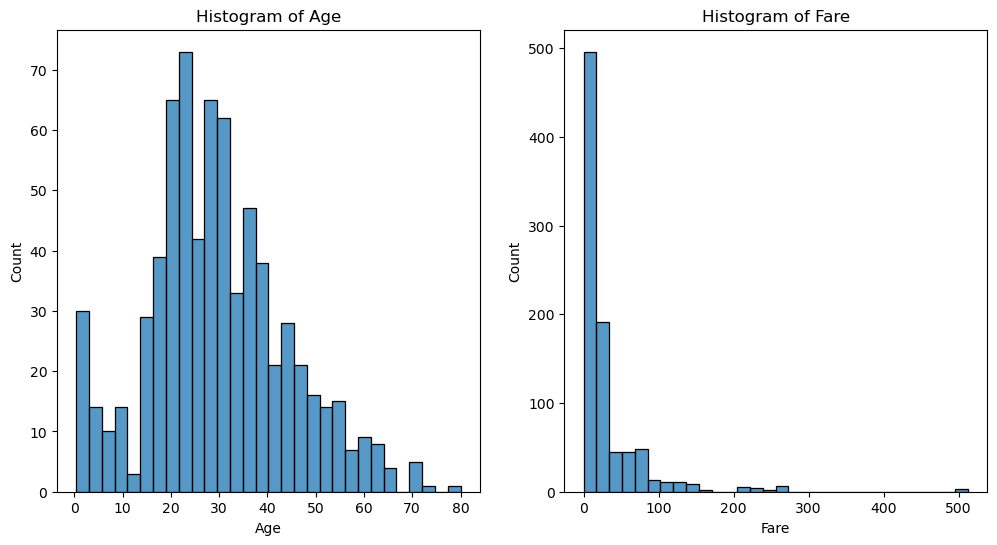

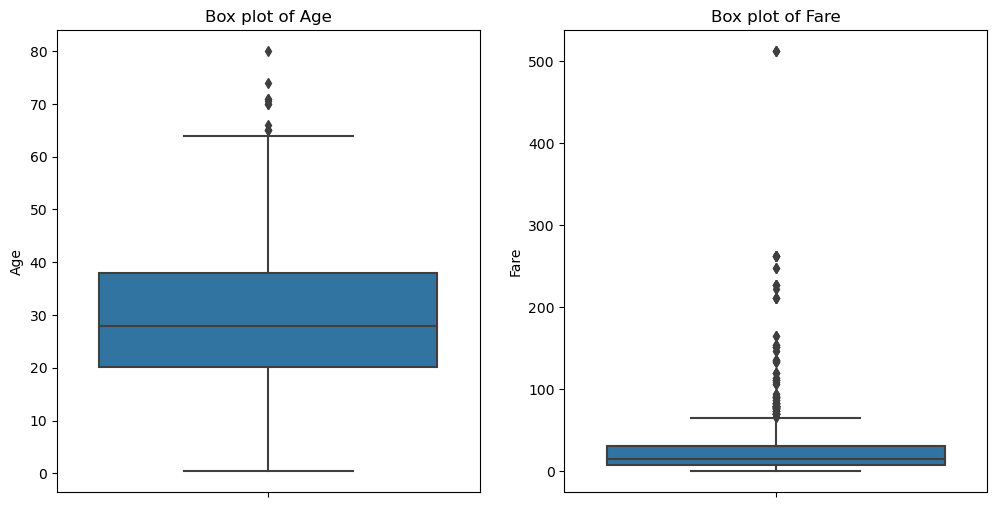

In [41]:
#4th Question

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=False, bins=30)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=False, bins=30)
plt.title('Histogram of Fare')
plt.show()

# Create box plots for 'Age' and 'Fare'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Box plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Box plot of Fare')
plt.show()


#These are the Box Plots and Histograms of Age and Fare Respectively. According to the formula (UpperBound + 1.5) X Interquartile Range and (LowerBound - 1.5) X Interquartile Range, the outliers in Box Plot can be found.
#Their Absence and presence can be estimated by looking at the graph.
#In Histograms, if there is a large difference in the height they can be termed as outliers.

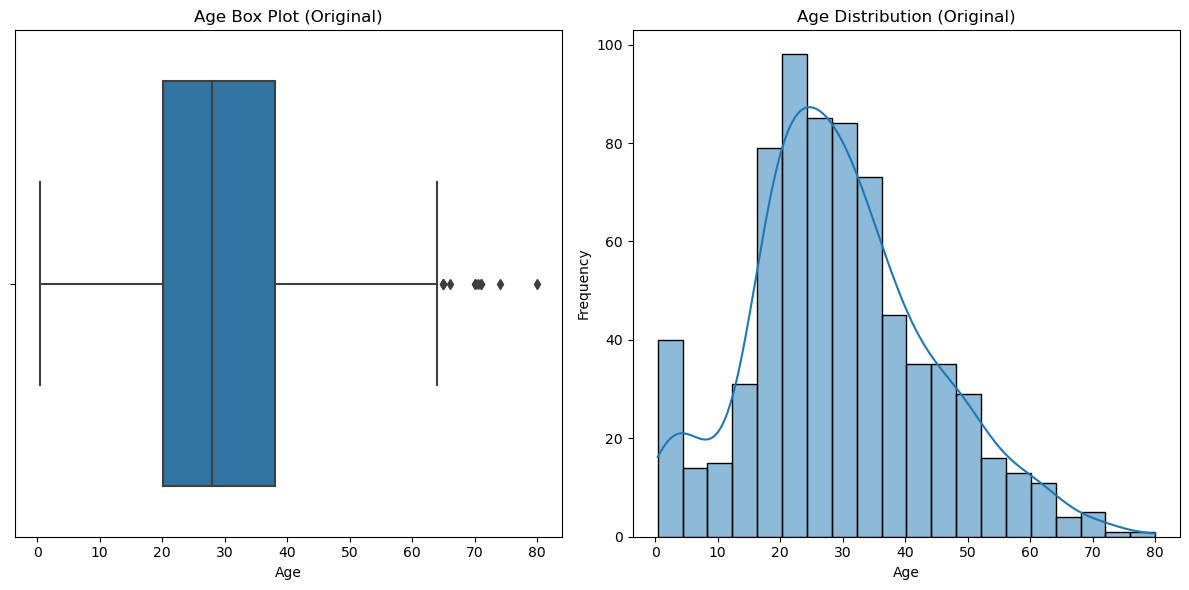

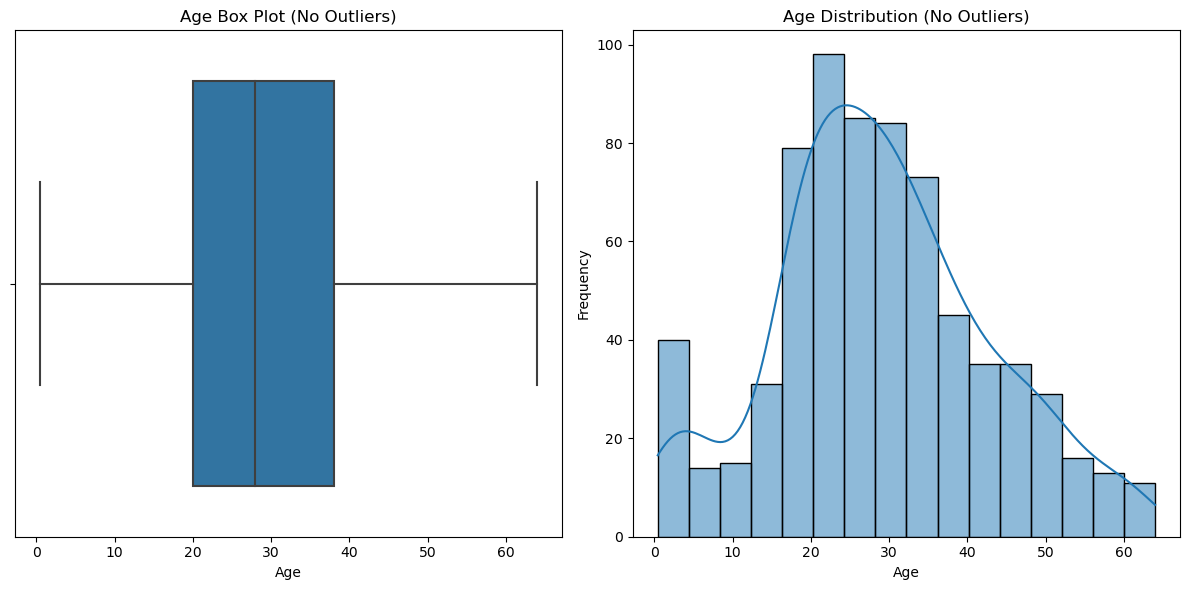

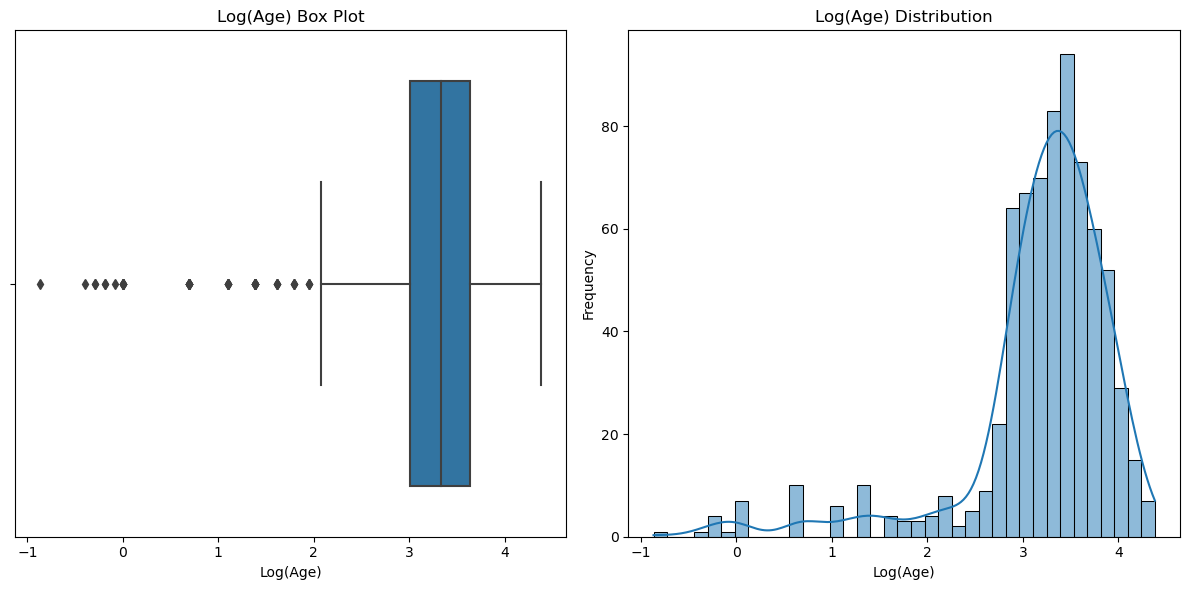

In [43]:
#5th Question

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")  


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Age')
plt.xlabel('Age')
plt.title('Age Box Plot (Original)')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution (Original)')

plt.tight_layout()
plt.show()

# Removing Outliers
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

# Visualize the 'Age' variable after removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df_no_outliers, x='Age')
plt.xlabel('Age')
plt.title('Age Box Plot (No Outliers)')

plt.subplot(1, 2, 2)
sns.histplot(data=df_no_outliers, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution (No Outliers)')

plt.tight_layout()
plt.show()

df['Log_Age'] = np.log(df['Age'])

# Visualize the 'Age' variable after applying a log transformation
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Log_Age')
plt.xlabel('Log(Age)')
plt.title('Log(Age) Box Plot')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Log_Age', kde=True)
plt.xlabel('Log(Age)')
plt.ylabel('Frequency')
plt.title('Log(Age) Distribution')

plt.tight_layout()
plt.show()

#By using the formula as given in the code (UpperBound + 1.5) X Interquartile Range and (LowerBound - 1.5) X Interquartile Range and removing the unwanted outliers of Histogram and constructing new plots by removing the outliers.

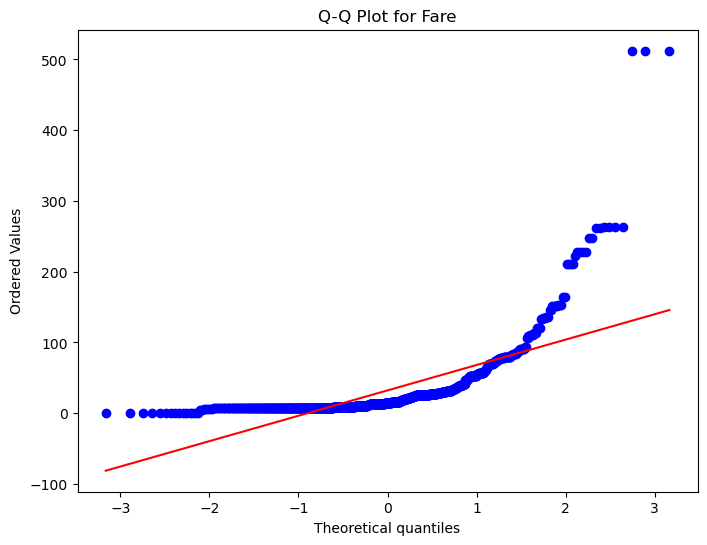

In [45]:
#6th Question

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")

fig, ax = plt.subplots(figsize=(8, 6))
stats.probplot(df['Fare'], plot=ax, fit=True)
ax.set_title('Q-Q Plot for Fare')

plt.show()

#As the data points deviate from the ideal line in a systematic way, it indicates that distribution fit is not strongly violated and it is approximately normally distributed. 

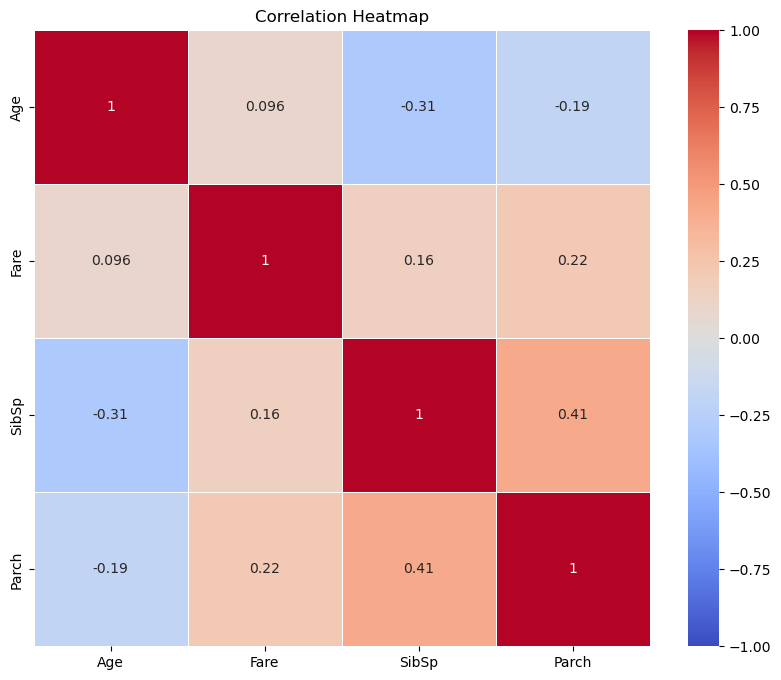

In [47]:
#7th Question

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")

numerical_variables = ['Age', 'Fare', 'SibSp', 'Parch']

correlation_matrix = df[numerical_variables].corr()

correlation_threshold = 0.2

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=.5)

plt.title('Correlation Heatmap')

plt.show()

#This is a corelation between Age and Fare, Age and SibSp, Age and Parch, Age and Age.
#The Co-relation Threshold has been set to 0.2

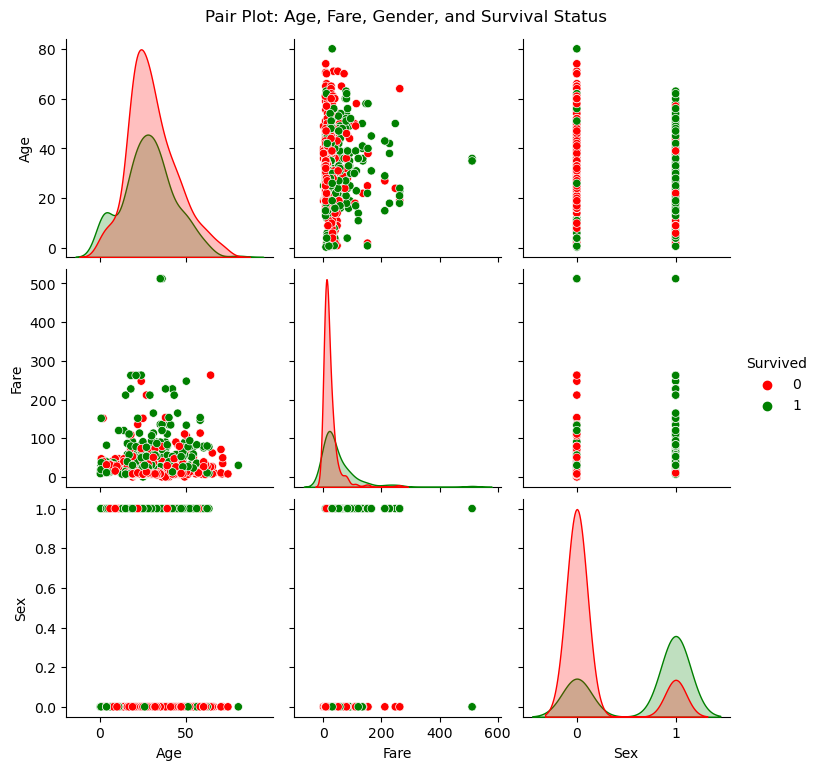

In [48]:
#8th Question 

selected_columns = ['Age', 'Fare', 'Sex', 'Survived']
data_subset = df[selected_columns].dropna()


data_subset['Sex'] = data_subset['Sex'].map({'male': 0, 'female': 1})
data_subset['Survived'] = data_subset['Survived'].astype(int)
pairplot = sns.pairplot(data_subset, hue='Survived', palette={0: 'red', 1: 'green'})
pairplot.fig.suptitle("Pair Plot: Age, Fare, Gender, and Survival Status", y=1.02)
plt.show()

#Age:
#Positive correlations are shown as data points sloping upwards, while negative correlations slope downwards
#As we can see multiple modes in the distribution indicating subpopulations within the data
#According to ScatterPlot we can see that the age is concentrated in the range of 20-60
#According to the pairplot there are almost nill to countable survivors in age group 25 - 60.

#Fare:
#Positive correlations are shown as data points sloping upwards, while negative correlations slope downwards
#As we can see multiple modes in the distribution indicating subpopulations within the data
#According to ScatterPlot we can see that the age is concentrated in the range of 0-100.

#Sex
#According to the distribution, the distribution is bimodal.
#

T-statistic: 6.839099259085254
P-value: 2.6993323503141236e-11


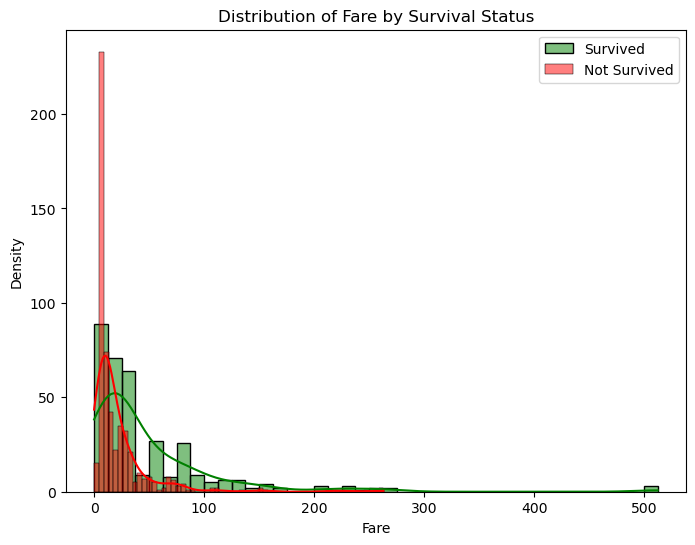

Reject the null hypothesis: There is a significant impact of fare on survival chances.


In [49]:
#9th Question

import pandas as pd
import seaborn as sns
from scipy.stats import ttest_ind

df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")

fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']


t_stat, p_value = ttest_ind(fare_survived, fare_not_survived, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Visualize the results using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=fare_survived, label='Survived', color='green', kde=True)
sns.histplot(data=fare_not_survived, label='Not Survived', color='red', kde=True)
plt.xlabel('Fare')
plt.ylabel('Density')
plt.title('Distribution of Fare by Survival Status')
plt.legend()
plt.show()


if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant impact of fare on survival chances.")
else:
    print("Fail to reject the null hypothesis: Fare may not have a significant impact on survival chances.")
    


#Null Hypothesis (H0): The mean fare of survivors (those who survived) is equal to the mean fare of non-survivors (those who did not survive).
#Alternative Hypothesis (H1): The mean fare of survivors is significantly different from the mean fare of non-survivors.

#A T-test is used to compare means and check whether the p-value is less than the chosen significance level (alpha) to determine if you should reject the null hypothesis or not.

In [50]:
#10th Question

import numpy as np

df = pd.read_csv("C:\\Users\\HP\\Downloads\\titanic.csv")

variable_of_interest = 'Age'

mean_value = df[variable_of_interest].mean()
std_dev = df[variable_of_interest].std()

confidence_level = 0.95

z_score = stats.norm.ppf((1 + confidence_level) / 2)
margin_of_error = z_score * (std_dev / np.sqrt(len(df)))

print(f"Margin of Error for {variable_of_interest}: {margin_of_error}")

#The Margin of Error can be calculated by the formula Z-score X (Standard Deviation)/sqrtroot(sample_size)
#After calculating the margin of error, you'll have a range around your sample estimate that provides a level of confidence in which the true population parameter is likely to fall
#From the previous analysis as the significance levels are 0.05, means this is a more stringent test and there is a smaller chance of error. 
#So the results inferred are correct and approximately related to the exact value to be determined.

Margin of Error for Age: 0.9538281768221958
